In [1]:
import HTSeq
import glob
import seaborn
import matplotlib.pyplot as plt
import numpy
from scipy.stats.stats import pearsonr
import itertools

def window(seq, n=31):
    it = iter(seq)
    result = tuple(itertools.islice(it,n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [2]:
All_kmers = {}
lengths = []
for genome in glob.glob('./Studied_genomes/*.fasta'):
    kmers = {}
    total_length = 0
    for read in HTSeq.FastaReader(genome):
        total_length += len(read.seq)
        print genome
        k = 11
        seq = read.seq
        for i in window(seq, k):
            kmer = "".join(i)
            if kmer in kmers:
                kmers[kmer] +=1
            else:
                kmers[kmer] = 1
    for k,v in kmers.iteritems():
        if k in All_kmers:
            prev = All_kmers[k]
            prev.append(v)
            All_kmers[k] = prev
        else:
            All_kmers[k] = [v]
            
    lengths.append(total_length)
            


./Studied_genomes/Aeropyrum pernix.fasta
./Studied_genomes/Aquifex aeolicus.fasta
./Studied_genomes/Archaeoglobus fulgidus.fasta
./Studied_genomes/Hyperthermus butyilicus.fasta
./Studied_genomes/Methanococcus jannaschii.fasta
./Studied_genomes/Methanopyrus kandleri AV19.fasta
./Studied_genomes/Methanothermus fervidus.fasta
./Studied_genomes/Pyrococcus furiosus.fasta
./Studied_genomes/Pyrodicitium abyssi.fasta
./Studied_genomes/Pyrolobus fumarii.fasta
./Studied_genomes/Sulfolobus acidocaldarius.fasta
./Studied_genomes/Thermocrinis minervae.fasta
./Studied_genomes/Thermocrinis ruber.fasta
./Studied_genomes/Thermotoga maritima.fasta


In [3]:
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]


occurance = {}
for k,v in All_kmers.iteritems():
    length = len(v)
    if length in occurance:
        occurance[length] +=1
    else:
        occurance[length] = 1


In [4]:
occurance

{1: 544270,
 2: 721782,
 3: 725853,
 4: 619204,
 5: 474559,
 6: 338985,
 7: 227191,
 8: 144217,
 9: 86850,
 10: 48386,
 11: 23121,
 12: 9383,
 13: 3190,
 14: 774}

In [5]:
#kmer 7 had 15,990
#kmer 9 had 84,973
#kmer 10 had 20,300
#kmer 11 had 911 shared
#kmer 12 had 23 shared
#kmer 13 had 3 shared
#kmer 15 had 1 shared


In [6]:
Present_kmers = {}


for k,v in All_kmers.iteritems():
    if len(v) == 14:
        #print k,v
        temp = []
        for d,f in zip(v,lengths):
            #print d,f
            value = ((float(d)/f)*100)
            temp.append(value)
        #print k, temp
        Present_kmers[k] = temp
        
print len(Present_kmers)

774


ATGGAAGGAGA
ATGGAAGGAGA [5.989114186055426e-05, 0.00019338182919872242, 9.18105031215571e-05, 5.9982137319506246e-05, 0.00036036685345681904, 5.899812916932404e-05, 0.00016085678759343767, 0.00015721161102074356, 0.00016996030860259766, 5.425150018960899e-05, 0.00022462228639431362, 0.00029241454733131515, 0.0001972338608462516, 0.00010748498569106127]
GC content;  45.4545454545


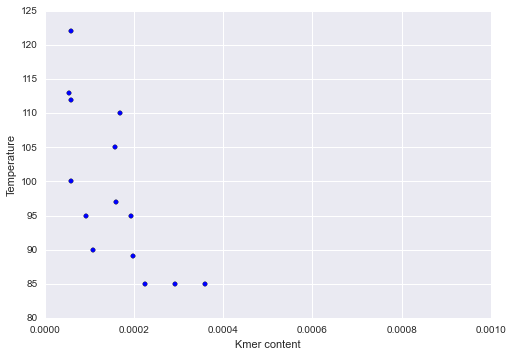

(-0.72107765463499018, 0.0036112071253071179)
TTTATCTCATC
TTTATCTCATC [5.989114186055426e-05, 0.00025784243893162986, 0.00013771575468233565, 5.9982137319506246e-05, 0.00036036685345681904, 5.899812916932404e-05, 8.042839379671884e-05, 0.00015721161102074356, 0.00028326718100432944, 5.425150018960899e-05, 0.00035939565823090184, 0.0005117254578298016, 0.00032872310141041934, 0.00048368243560977577]
GC content;  27.2727272727


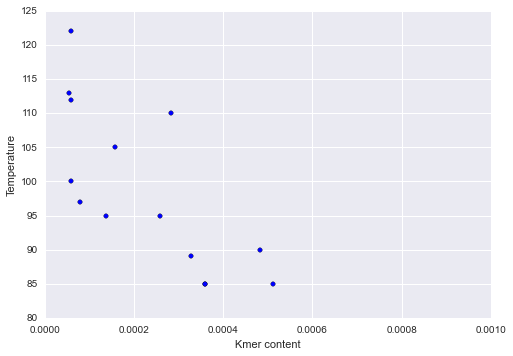

(-0.74787887163729561, 0.002099915149525706)
TTCTCCTCCAG
TTCTCCTCCAG [0.00023956456744221705, 0.00019338182919872242, 0.0002295262578038928, 0.0003598928239170375, 6.0061142242803175e-05, 0.00029499064584662024, 8.042839379671884e-05, 0.00026201935170123926, 0.00028326718100432944, 0.00037976050132726294, 8.984891455772546e-05, 0.0002193109104984864, 0.00013148924056416775, 0.00010748498569106127]
GC content;  54.5454545455


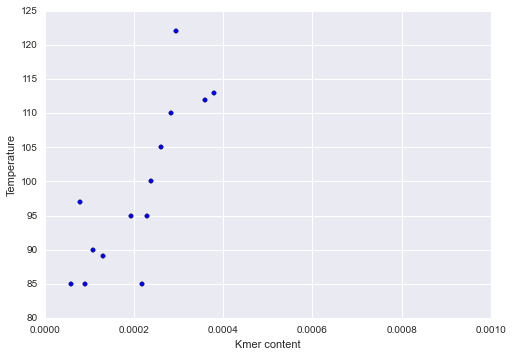

(0.81251635474726192, 0.00041312970779042526)
CTCCTCTTCAT
CTCCTCTTCAT [0.0002994557093027713, 0.00012892121946581493, 0.0001836210062431142, 5.9982137319506246e-05, 0.0004204279956996222, 5.899812916932404e-05, 0.00024128518139015652, 0.00015721161102074356, 0.00022661374480346358, 0.00016275450056882698, 0.00022462228639431362, 0.00036551818416414396, 0.0001972338608462516, 0.0002687124642276532]
GC content;  45.4545454545


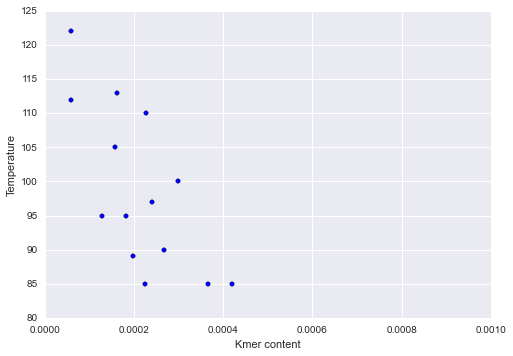

(-0.71479090299292247, 0.0040660010696763095)
AGGAGCTCCTC
AGGAGCTCCTC [0.00023956456744221705, 0.00019338182919872242, 4.590525156077855e-05, 0.00011996427463901249, 0.00012012228448560635, 0.0008849719375398607, 8.042839379671884e-05, 5.240387034024785e-05, 0.00028326718100432944, 0.000488263501706481, 4.492445727886273e-05, 0.00014620727366565758, 6.574462028208387e-05, 0.00010748498569106127]
GC content;  63.6363636364


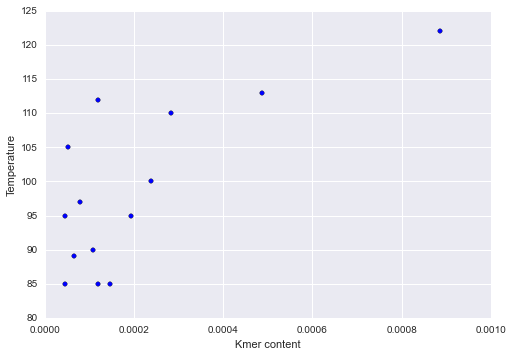

(0.72644478321142836, 0.0032554698058270791)
AGGAAGAGGAG
AGGAAGAGGAG [0.0006588025604660968, 0.0003223030486645373, 0.0003213367609254499, 0.000719785647834075, 0.0002402445689712127, 0.0005899812916932405, 8.042839379671884e-05, 0.0003144232220414871, 0.0005665343620086589, 0.0004340120015168719, 0.00017969782911545092, 0.0002193109104984864, 0.0003944677216925032, 0.00016122747853659192]
GC content;  54.5454545455


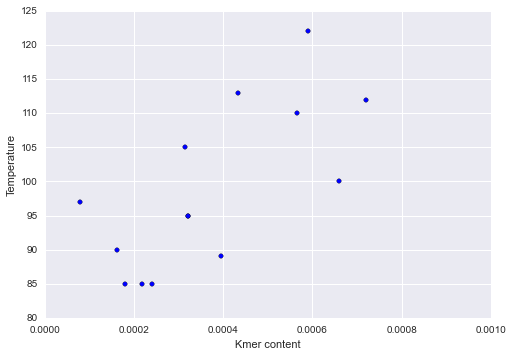

(0.71010754109892738, 0.0044330894513461526)
Sig total;  6
Tested total;  774


In [32]:
species_temp = {}
tots = 0
tested = 0
wanted = []
sigg = []
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]
count = 0
for k,v in Present_kmers.iteritems():
    count +=1
    tested +=1
    info = pearsonr(v, Temp)
    wanted.append(info[1])
    if info[1] > 0.05:
        continue
    else:
        if info[0] > 0.7 or info[0] < -0.7:
            print k
            print k,v
            GC = 0
            for i in k:
                if i == 'G' or i == 'C':
                    GC+=1
            GC_perc = (float(GC)/11)*100
            print 'GC content; ' , GC_perc
            plt.scatter(v, Temp)
            plt.xlabel('Kmer content')
            plt.ylabel('Temperature')
            plt.xlim(0,0.001)
            plt.show()
            print pearsonr(v, Temp)
            sigg.append(count-1)
            tots +=1

print 'Sig total; ', tots
print 'Tested total; ', tested

In [33]:
#Huge sig results
#K=12, 0
#K=11, 7,  5 less utilised in high temps, 2 more utilised in high temps

#Apply bonferroni correction

In [34]:
def correct_pvalues_for_multiple_testing(pvalues, correction_type = "Benjamini-Hochberg"):                
    """                                                                                                   
    consistent with R - print correct_pvalues_for_multiple_testing([0.0, 0.01, 0.029, 0.03, 0.031, 0.05, 0.069, 0.07, 0.071, 0.09, 0.1]) 
    """
    from numpy import array, empty                                                                        
    pvalues = array(pvalues) 
    n = float(pvalues.shape[0])                                                                           
    new_pvalues = empty(n)
    if correction_type == "Bonferroni":                                                                   
        new_pvalues = n * pvalues
    elif correction_type == "Bonferroni-Holm":                                                            
        values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
        values.sort()
        for rank, vals in enumerate(values):                                                              
            pvalue, i = vals
            new_pvalues[i] = (n-rank) * pvalue                                                            
    elif correction_type == "Benjamini-Hochberg":                                                         
        values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
        values.sort()
        values.reverse()                                                                                  
        new_values = []
        for i, vals in enumerate(values):                                                                 
            rank = n - i
            pvalue, index = vals                                                                          
            new_values.append((n/rank) * pvalue)                                                          
        for i in xrange(0, int(n)-1):  
            if new_values[i] < new_values[i+1]:                                                           
                new_values[i+1] = new_values[i]                                                           
        for i, vals in enumerate(values):
            pvalue, index = vals
            new_pvalues[index] = new_values[i]                                                                                                                  
    return new_pvalues



In [35]:
for s,i in enumerate(correct_pvalues_for_multiple_testing(wanted)):
    if s in sigg:
        print i

0.571868539224
0.571868539224
0.31976239383
0.571868539224
0.571868539224
0.571868539224


/Users/thomashitch/lab-dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
